In [1]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

import sklearn as sk
from sklearn.model_selection import train_test_split


### 특성공학 / 규제

#### 데이터 준비

In [2]:
df = pd.read_csv('http://bit.ly/perch_csv_data')
df.tail()

,length,height,width
51,42.0,12.80,6.87
52,43.0,11.93,7.28
53,43.0,12.51,7.42
54,43.5,12.60,8.14
55,44.0,12.49,7.60


In [3]:
perch_full = df.to_numpy()          #데이터프레임을 넘파이리스트로 
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

#### 농어데이터

농어의 길이, 높이, 두께 >>> 농어의 무게를 예측

In [4]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])
len(perch_weight)

56

#### 훈련/데이터세트 나누기

In [5]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight,
                                                                    #   test_size=0.3,
                                                                      random_state=42)

In [6]:
print(train_input.shape)
print(test_input.shape)

(42, 3)
(14, 3)


In [7]:
print(train_target.shape)
print(test_target.shape)

(42,)
(14,)


#### 사이킷런 변환기

특성이 하나 이상일 때 하나의 특성(새로운 회귀방정식)을 만드는 것.

In [8]:
# 특성을 만들거나 전처리하기위한 사이킷런의 클래스 : 변환기
from sklearn.preprocessing import PolynomialFeatures


##### 예제

In [9]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [10]:
poly.get_feature_names()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

#####  농어 데이터 3개의 특징

트랜스포머로 특징을 분리

In [11]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)       #입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [12]:
poly.get_feature_names()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [13]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

#### 다중 회귀 모델 훈련하기

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [16]:
lr.score(train_poly,train_target)

0.9903183436982124

In [17]:
lr.score(test_poly,test_target)

0.9714559911594145

#### 예측하기 윟나 데이터도 변환

In [18]:
pred_x =[[50.0, 13.5, 9.2]]
poly_p = PolynomialFeatures(include_bias=False)
poly_p.fit(pred_x)       #입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
pred_poly = poly.transform(pred_x)
pred_poly.shape

(1, 9)

In [19]:
pred_poly

array([[  50.  ,   13.5 ,    9.2 , 2500.  ,  675.  ,  460.  ,  182.25,
         124.2 ,   84.64]])

In [20]:
lr.predict(X=pred_poly)

array([1634.45893639])

#### 추가적인 내용

In [21]:
poly = PolynomialFeatures(degree= 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [22]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999996176

In [23]:
lr.score(test_poly, test_target)

# 과적합의 문제 발생.  과적합을 줄이는 또다른 방법으로 '규제'를 학습

-144.40585108215134

### 규제

훈련세트에 치중해서 과대적합이 되지 않도록 해주는 작업

#### 표준화 작업

( 입력값 - 평균 ) / 표준편차    >>> 일정한 단위가 되도록

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [26]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

#### 규제모델 1 : 릿지회귀모델

In [27]:
from sklearn.linear_model import Ridge

In [28]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [29]:
ridge.score(test_scaled, test_target)

0.9790693977615383

릿지와 라쏘모델을사용할때 규제의 양을 임의로 조절 가능

alpha 값은 사람이 임의로 지정해야 하는 값(<b>하이퍼파라미터</b>)으로

이 값이 크면 규제강도가 올라가 좀더 과소적합되도록 유도.

값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀모델과 유사해지므로 과대적합 가능성 올라감.

<b> 머신러닝과 딥러닝에서 중요한 부분 </b>

#### 적절한 규제정도 찾기 ( <b>하이퍼파라미터 alpha</b> )

In [30]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:    #6번 훈련
    ridge = Ridge(alpha=alpha)  #alpha 갑승ㄹ변경하면서 생성 6번
    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

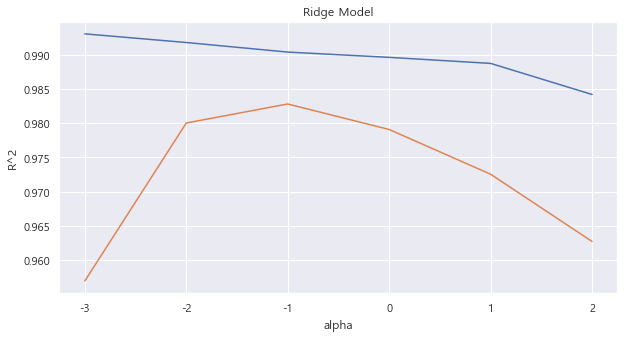

In [31]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('Ridge Model')
plt.show()

왼쪽은 훈련세트의 점수가 높고 테스트세트의 점수가 낮아 차이가 벌어지는 <b>과대적합</b>

오른쪽은 두 세트 모두 점수가 낮아지는 <b>과소적합</b>

따라서 두 세트의 차이가 제일 적은 alpha=0.1이 제일 적절한 규제정도이다.

In [32]:
# alpha 0.1로 재훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9903815817570366

In [33]:
ridge.score(test_scaled, test_target)

0.9827976465386937

#### 규제모델 2 : 라쏘회귀모델

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [36]:
lasso.score(test_scaled, test_target)

0.9800593698421884

In [37]:
# 라쏘 모델 역시 alpha값을 지정하여 규제정도조정 가능
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:    #6번 훈련
    lasso = Lasso(alpha=alpha, max_iter=10000)  #alpha 값을 변경하면서 생성 6번. 최적계수를 찾기위한 반복횟수가 부족하면 convergencewarning이 뜨기에 max_iter를 10000으로 설정
    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [38]:
print(lasso.coef_)
print(lasso.intercept_)

[  0.           0.           0.           0.           1.19398959
   0.           0.           0.           0.           0.
   0.           0.          80.03201415 168.24077938   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
400.8333333333333


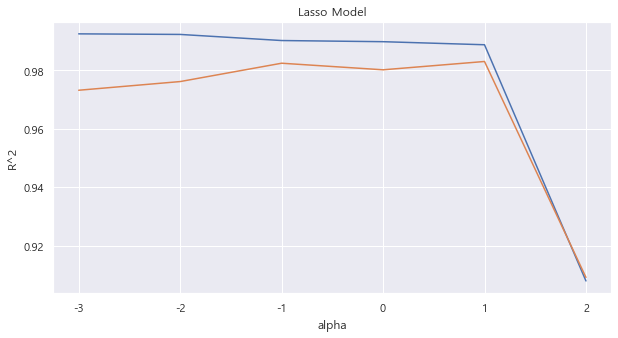

In [39]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('Lasso Model')
plt.show()

In [40]:
# 라쏘 모델에서의 최적의 alpha 값은 10
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.9888067471131867

In [41]:
lasso.score(test_scaled, test_target)

0.9824470598706695

In [44]:
# 55개의 특성 중 라쏘모델이 사용한 특성은 15개에 불과함. 이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있음.
print(lasso.coef_)
print(lasso.intercept_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
400.8333333333333
